# Progetto PAA
#### Autore:  Federico Schipani - 6185896 - <a href="mailto:federico.schipani@stud.unifi.it">federico.schipani@stud.unifi.it</a>

##### Descrizione del progetto:
In questo notebook verranno effettuate verifiche numeriche su somme infinite dei reciproci dei numeri di Tribonacci. L'articolo da cui è stato preso spunto per questo progetto è <a href = "https://cs.uwaterloo.ca/journals/JIS/VOL19/Kuhapatanakul/kuha7.pdf">Reciprocal Sums of the Tribonacci Numbers</a>.

### Preparazione:
Per prima cosa è necessario importare tutti i pacchetti necessari allo svolgimento di questo progetto:

In [26]:
from sympy import *
from sympy.utilities.lambdify import lambdify, implemented_function
from functools import lru_cache
import sys
sys.setrecursionlimit(10000000)

Per poter stampare i risultati in stile LaTeX è necessario eseguire questa istruzione:

In [27]:
init_printing()

### Introduzione:

I numeri di Fibonacci sono definiti dalla seguente relazione di ricorrenza:

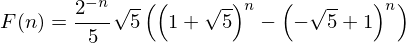

In [28]:
F = Function('F')
n = symbols('n',integer=True)
f = F(n+1)-F(n)-F(n-1)
closedFib = simplify(rsolve(f, F(n), {F(0):0, F(1):1}))
closedFibEq = Eq(F(n), closedFib)
closedFibEq

In [29]:
closedFib1 = Lambda([n], closedFib)
[(n, simplify(fibonacci(n)-closedFib1(n).doit())) for n in range(0,11)]

Definiamo una funzione per il calcolo dei numeri di Tribonacci nel seguente modo:

In [30]:
initial_positive_conditions = {0:0, 1:1, 2:1}


def makePositiveTribonacci(maxsize = None):
    @lru_cache(maxsize)
    def calcPositiveTribonacci(n):
        return calcPositiveTribonacci(n-1)  + calcPositiveTribonacci(n-2) + calcPositiveTribonacci(n-3) if n not in initial_positive_conditions else initial_positive_conditions[n]
    return calcPositiveTribonacci

positiveTribonacci = makePositiveTribonacci(None)
PT = implemented_function(Function('T'), positiveTribonacci)


Per verificare che la funzione calcola effettivamente i numeri di Tribonacci si esegue una verifica numerica:

In [31]:
lambda_tribonacci = lambdify(n, PT(n))
[(n, lambda_tribonacci(n)) for n in range (0,11)]

Lo scopo di questo notebook è verificare queste tre uguaglianze:
$$\left\lfloor \left( \sum_{k=n}^{\infty}  \frac{1}{F_k } \right)^{-1}\right\rfloor = F_{n-2}\ se\ n\ è\ pari\ e\ n \geq 2,\ F_{n-2}-1\ se\ n\ è\ dispari\ e\ n \geq 1 $$
$$\left\lfloor\left(\sum_{k=n}^{\infty}  \frac{(-1)^k}{F_k}\right)^{-1}\right\rfloor = (-1)^n F_{n+1}-1\ con\ (n>1) $$
$$\left\lfloor\left(\sum_{k=n}^{\infty}  \frac{1}{\sum_{i = 1}^{k} F_i}\right)^{-1}\right\rfloor = F_n -1\ con \ (n \geq 3) $$

### Svolgimento:

La sequenza di numeri di Tribonacci può essere estesa per valori negativi di n, usando la definizione e le condizioni iniziali.
$$F_n = F_{n-1}+F_{n-2}+F_{n-3}$$
Effettuando uno shift di tre posizioni, e cambiando il segno si ottiene:
$$F_{n} = F_{n-3}-F_{n+2}-F_{n+1}$$


In [32]:
initial_negative_conditions = {0:0, -1:0, -2:1}
def makeNegativeTribonacci(maxsize=None):
    @lru_cache(maxsize=maxsize)
    def calcNegativeTribonacci(n):
        return calcNegativeTribonacci(n+3)  - calcNegativeTribonacci(n+2) - calcNegativeTribonacci(n+1) if n not in initial_negative_conditions else initial_negative_conditions[n]
    return calcNegativeTribonacci
negativeTribonacci = makeNegativeTribonacci(maxsize = None)
NT = implemented_function(Function('NT'), negativeTribonacci)
lambda_negative_tribonacci = lambdify(n, NT(n))
[(n*-1, lambda_negative_tribonacci(n*-1)) for n in range (0,11)]

Per comodità definiamo una funzione di Tribonacci unica, sia per i numeri negativi che positivi:

In [33]:
def tribonacci(n):
    if n>=0:
        return positiveTribonacci(n)
    elif n<0:
        return negativeTribonacci(n)
T = implemented_function(Function('T'), tribonacci)
lambda_tribonacci = lambdify(n, T(n))
[(n, lambda_tribonacci(n)) for n in range(-40, 40)]
#SWAG EFFICIENZA

Prima di dimostrare la veridicità delle tre uguaglianze descritte nell'introduzione vengono forniti 3 lemmi.
###### Lemma 1: 
Sia $n$ un intero positivo, allora:
1. $T^{2}_{n} - T_{n-1} T_{n+1} = T_{-(n+1)}$
2. $\sum_{i=1}^{n} T_i = (T_{n+2}+T_{n}-1)/2$ 
3. $T_{n} > T_{-(n+3)}$ 


Effettuiamo una verifica numerica della prima uguaglianza:

In [34]:
lem1_expr1 = T(n)**2 - T(n-1)*T(n+1)
lem1_expr2 = T(-(n+1))
calc_lem1_expr1 = Lambda([n], simplify(lem1_expr1))
calc_lem1_expr2 = Lambda([n], simplify(lem1_expr2))
[(calc_lem1_expr1(n).evalf()-calc_lem1_expr2(n).evalf()) for n in range(0,40)]

Effettuiamo una verifica numerica della seconda uguaglianza:

In [35]:
lem1_expr4 = (T(n+2)+T(n)-1)/2
i = symbols('i', integer=True)
lem1_expr3 = Sum(T(i), (i, 1, n))
calc_lem1_expr4 = Lambda([n], simplify(lem1_expr4))
calc_lem1_expr3 = Lambda([n], simplify(lem1_expr3))
[(calc_lem1_expr4(n).evalf()-calc_lem1_expr3(n).doit().evalf()) for n in range(0,40)]

Effettuiamo una verifica numerica del terzo risultato:

In [36]:
[(n, T(n).evalf()>T(-(n+3)).evalf()) for n in range(0, 100)]

###### Lemma 2: 
Sia $n > 1$ un intero positivo, allora:
1. $\frac{1}{T_n - T_{n-1} + 1} < \sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1} - 1} $
2. $\frac{1}{(-1)^n(T_n+T_{n-1})+1} < \sum_{k=n}^{\infty} \frac{(-1)^k}{T_k} < \frac{1}{(-1)^n(T_n+T_{n-1})-1}$

Per verificare numericamente le due uguaglianze bisogna in qualche modo cercare di dare un valore alla sommatoria per $k=n$ che arriva fino a $\infty$.
Per prima cosa si verifica:
$$\frac{1}{T_n - T_{n-1}+1} < \sum_{k=n}^{\infty} \frac{1}{T_k} $$
In questo caso per verificare questa uguaglianza è sufficiente fissare un limite superiore abbastanza grande:

In [37]:
lem2_expr1 = 1/(T(n)-T(n-1)+1)
k = symbols('k', integer=True)
lem2_expr2 = Sum(1/T(k), (k, n, 200))
calc_lem2_expr2 = Lambda([n], lem2_expr2)
calc_lem2_expr1 = Lambda([n], lem2_expr1)
[(n, calc_lem2_expr1(n).evalf() < calc_lem2_expr2(n).doit().evalf()) for n in range(2, 40)]

Infine per verificare il primo  risultato basta verificare la seconda parte della disuguaglianza:
$$\sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1} - 1}$$

In [38]:
lem2_expr3 = 1/(T(n)-T(n-1)-1)
calc_lem2_expr3 = Lambda([n], lem2_expr3)
[(n, calc_lem2_expr2(n).doit().evalf() < calc_lem2_expr3(n).evalf()) for n in range(2,40)]

Nella verifica del secondo risultato si segue lo stesso approccio:
$$\frac{1}{(-1)^n(T_n+T_{n-1})+1} < \sum_{k=n}^{\infty} \frac{(-1)^k}{T_k}$$
E poi 
$$\sum_{k=n}^{\infty} \frac{(-1)^k}{T_k} < \frac{1}{(-1)^n(T_n+T_{n-1})-1}$$

In [39]:
lem2_expr4 = 1/(((-1)**n) * (T(n)+T(n-1))+1)
lem2_expr5 =  Sum(((-1)**k)/T(k), (k, n, 200))
calc_lem2_expr5 = Lambda([n], lem2_expr5)
calc_lem2_expr4 = Lambda([n], lem2_expr4)
[(n, calc_lem2_expr4(n).evalf() < calc_lem2_expr5(n).doit().evalf()) for n in range(2, 40)]
#SWAG CALCOLI

In [40]:
lem2_expr6 = 1/(((-1)**n) * (T(n)+T(n-1))-1)
calc_lem2_expr6 = Lambda([n], lem2_expr6)
[(n, calc_lem2_expr6(n).evalf() > calc_lem2_expr5(n).doit().evalf()) for n in range(2, 60)]

###### Lemma 3: 
Sia $n>2$ un intero positivo, allora:
1. Se $T_{-(n+1)} < 0$, allora $\sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1}}$
2. Se $T_{-(n+1)} > 0$, allora $\sum_{k=n}^{\infty} \frac{1}{T_k} > \frac{1}{T_n - T_{n-1}}$

Per verificare i risultati di questo lemma si possono effettuare verifiche numeriche:

Per il primo caso si ha:
Se $T_{-(n+1)} < 0$, allora 
$$\sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1}}$$



Effettuiamo una verifica numerica, per ovvi motivi non si può effettuare una sommatoria di numeri infiniti, quindi ci limiteremo a fissare un limite superiore abbastanza grande.

In [44]:
k = symbols('k', integer=True)
calc_lem3_expr6 = Lambda([n], Sum(1/T(k), (k,n,200)))
calc_lem3_expr7 = Lambda([n], 1/(T(n)-T(n-1)))
[(n, calc_lem3_expr6(n).doit().evalf() < calc_lem3_expr7(n).evalf() ) for n in range(3,40) if lambda_tribonacci(-(n+1))<0]

Si può ora effettuare una verifica del secondo risultato di questo lemma.
Se $T_{-(n+1)} > 0$, allora $$\sum_{k=n}^{\infty} \frac{1}{T_k} > \frac{1}{T_n - T_{n-1}}$$

Per effettuare questa verifica viene messo alla sommatoria un limite superiore abbastanza alto, in modo da mostrare che i valori convergono al risultato desiderato. 


In [42]:
[(n, calc_lem3_expr6(n).doit().evalf() > calc_lem3_expr7(n).evalf() ) for n in range(3,60) if lambda_tribonacci(-(n+1))>0]

Probabilmente per motivi legati alla precisione di macchina per alcuni valori il risultato non è verificato, prendiamo per esempio il caso in cui $n = 44$ e facciamo vedere che il risultato della sommatoria si avvicina sempre di più al valore desiderato.

In [46]:
w = symbols('w', integer=True)
calc_lem3_expr8 = Lambda([w], Sum(1/T(k), (k,44,w)))
#IL RISULTATO DELLA SOMMATORIA DOVREBBE ESSERE MAGGIORE, MA PER QUALUNQUE VALORE NON RAGGIUNGE MAI IL RISULTATO SPERATO
[(calc_lem3_expr7(44).evalf(), calc_lem3_expr8(w).doit().evalf()) for w in range(0, 2000, 50)]